# Random forest classifier

In [7]:
from src.data.data_fetcher import get_raw_data
from src.features.feature_engineering import prepare_data
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from src.features.preprocess_data import fetch_preprocessed_data, get_preprocessed_test_data
from src.features.preprocess_data import get_final_prediction

In [8]:
train_a, train_b, train_c, X_train_estimated_a, X_train_estimated_b, X_train_estimated_c, X_train_observed_a, X_train_observed_b, X_train_observed_c, X_test_estimated_a, X_test_estimated_b, X_test_estimated_c = get_raw_data()

In [9]:
X_train_obs_combined, X_val_obs_combined, y_train_obs_combined, y_val_obs_combined, X_train_est_combined, X_val_est_combined, y_train_est_combined, y_val_est_combined = fetch_preprocessed_data()
X_test_estimated_a_processed, X_test_estimated_b_processed, X_test_estimated_c_processed = get_preprocessed_test_data()

c:\Users\Bruker\OneDrive\NTNU semester 05\TDT4173 Maskinlæring\ml_power_predictor\src\features\feature_engineering.py:386: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  estimated_resampled = estimated.resample("1H").mean()
c:\Users\Bruker\OneDrive\NTNU semester 05\TDT4173 Maskinlæring\ml_power_predictor\src\features\feature_engineering.py:386: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  estimated_resampled = estimated.resample("1H").mean()
c:\Users\Bruker\OneDrive\NTNU semester 05\TDT4173 Maskinlæring\ml_power_predictor\src\features\feature_engineering.py:386: FutureWarning: The default value of numeric_o

Before dropping (99088, 51)
Description missing values: time                                  0
pv_measurement                     6064
date_forecast                     10999
absolute_humidity_2m:gm3          10999
air_density_2m:kgm3               10999
clear_sky_energy_1h:J             10999
clear_sky_rad:W                   10999
cloud_base_agl:m                      0
dew_or_rime:idx                   10999
dew_point_2m:K                    10999
diffuse_rad:W                     10999
diffuse_rad_1h:J                  10999
direct_rad:W                      10999
direct_rad_1h:J                   10999
effective_cloud_cover:p           10999
fresh_snow_12h:cm                 10999
fresh_snow_1h:cm                  10999
fresh_snow_24h:cm                 10999
fresh_snow_3h:cm                  10999
fresh_snow_6h:cm                  10999
is_day:idx                        10999
is_in_shadow:idx                  10999
msl_pressure:hPa                  10999
precip_5min:mm          

c:\Users\Bruker\OneDrive\NTNU semester 05\TDT4173 Maskinlæring\ml_power_predictor\src\features\feature_engineering.py:148: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["sin_day_of_year"] = df["date_forecast"].apply(get_sin_day)
c:\Users\Bruker\OneDrive\NTNU semester 05\TDT4173 Maskinlæring\ml_power_predictor\src\features\feature_engineering.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["cos_day_of_year"] = df["date_forecast"].apply(get_cos_day)
c:\Users\Bruker\OneDrive\NTNU semester 05\TDT417

In [10]:
# Initialize a Random Forest regressor
rf_model = RandomForestRegressor(n_estimators=1, random_state=42)

# Train the Random Forest model on the cleaned training data
rf_model.fit(X_train_obs_combined, y_train_obs_combined)

# Predict on the cleaned validation set
y_val_pred_rf = rf_model.predict(X_val_obs_combined)

# Evaluate the Random Forest model using MAE on the cleaned validation set
mae_rf = mean_absolute_error(y_val_obs_combined, y_val_pred_rf)
print(f"Mean Absolute Error = {mae_rf}")


Mean Absolute Error = 125.2930729611118


In [11]:
# Predict the target variable on the validation observed data
y_pred_val_obs_combined = rf_model.predict(X_val_obs_combined)
y_pred_val_est_combined = rf_model.predict(X_val_est_combined)

# Evaluate the model's performance using Mean Absolute Error (MAE) on the combined validation observed data
mae_obs_combined = mean_absolute_error(y_val_obs_combined, y_pred_val_obs_combined)
mae_est_combined = mean_absolute_error(y_val_est_combined, y_pred_val_est_combined)
print('MAE on validation observed data: ', mae_obs_combined)
print('MAE on validation estimated data: ', mae_est_combined)


MAE on validation observed data:  125.2930729611118
MAE on validation estimated data:  87.21067435606743


In [12]:
y_pred_test_est_a = rf_model.predict(X_test_estimated_a_processed)
y_pred_test_est_b = rf_model.predict(X_test_estimated_b_processed)
y_pred_test_est_c = rf_model.predict(X_test_estimated_c_processed)
# Step 4: Combine the predictions from the three locations into a single dataframe

y_pred_test_est_combined = get_final_prediction(y_pred_test_est_a, y_pred_test_est_b, y_pred_test_est_c)
y_pred_test_est_combined.shape


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- ceiling_height_agl:m
- elevation:m
- snow_density:kgm3


## Step x: Visualize the results

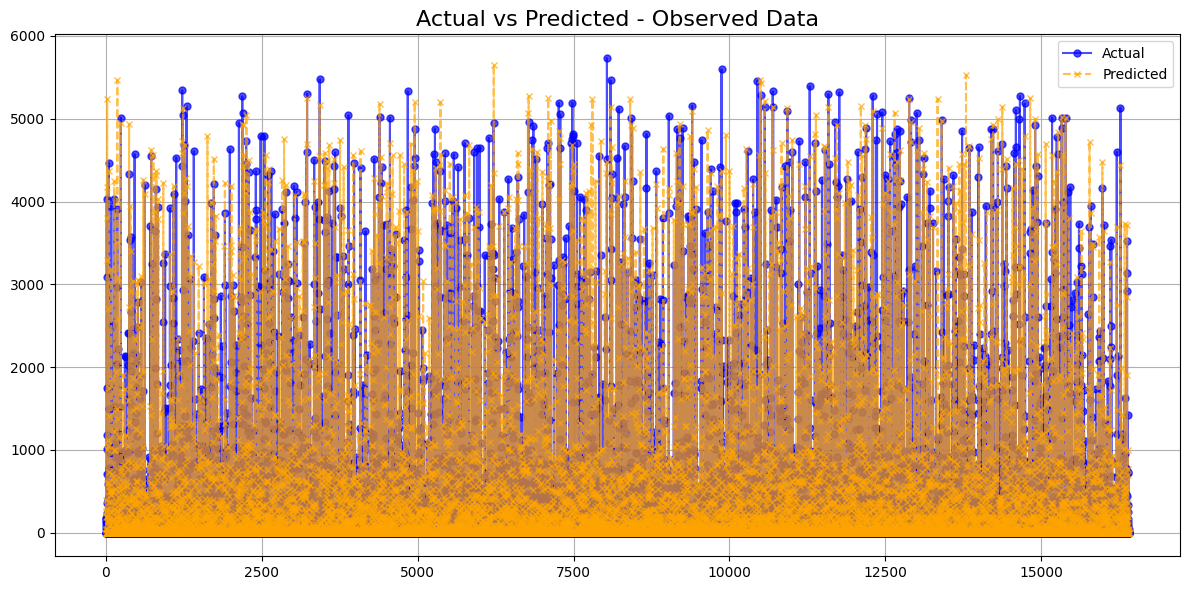

NameError: name 'y_pred_test_est_combined' is not defined

<Figure size 1200x600 with 0 Axes>

In [13]:

from matplotlib import pyplot as plt
import pandas as pd
# Set up the plotting area
plt.figure(figsize=(12, 6))

# Line plot of Actual values
plt.plot(y_val_obs_combined.reset_index(drop=True), label='Actual', linestyle='-', marker='o', markersize=5, alpha=0.7, color='blue')

# Line plot of Predicted values
plt.plot(pd.Series(y_pred_val_obs_combined, index=y_val_obs_combined.index).reset_index(drop=True), label='Predicted', linestyle='--', marker='x', markersize=5, alpha=0.7, color='orange')

# Titles and labels
plt.title('Actual vs Predicted - Observed Data', fontsize=16)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# # Plot y_pred_test_est_combined over time
# plt.figure(figsize=(12, 6))
# plt.plot(y_pred_test_est_combined["time"], y_pred_test_est_combined["prediction"], label='Predicted', linestyle='--', marker='o', markersize=5, alpha=0.7)
# plt.title('Predictions over time', fontsize=16)
# plt.xlabel('Time', fontsize=14)
# plt.ylabel('Prediction', fontsize=14)
# plt.grid(True)
# plt.tight_layout()
# plt.show()

## Deliver the best model

In [ ]:

from src.models.saving import save_predictions


save_predictions(y_pred_test_est_combined, 'random_forest_with_all_data')

   id  prediction
0   0      0.0000
1   1      0.0000
2   2      0.0198
3   3      0.1379
4   4    173.4656
